<a href="https://colab.research.google.com/github/shivaniagrawal19/Online_shoppers_intention/blob/main/steps.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fitness Qualtrics Data Analysis

In [1]:
#Research Project - Fitbit Qualtrics Data # Dr.Sinjini Mitra
#Import generic libraries
import pandas as pd
import numpy as np
from sklearn import metrics

In [5]:
#Read the data in dataframe
dat1 = pd.read_excel('/content/drive/MyDrive/Research_Prof.Sinjini_Mitra/FitBit_Data.xlsx')

# Review the dataset

In [6]:
dat1.shape

(144, 84)

In [7]:
dat1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 84 columns):
 #   Column                                                                                                                                                                                                        Non-Null Count  Dtype  
---  ------                                                                                                                                                                                                        --------------  -----  
 0   age                                                                                                                                                                                                           114 non-null    float64
 1   gender                                                                                                                                                                                   

In [8]:
dat1.describe()

,age,gender,education,weight,height,Do you consider your weight as,evaluate your own health,Do you suffer from any chronic condition,exercise for at least 30 minutes,How many times per week exercise for at least 30 minutes,exercise minutes,presence of health goals,extent to which you agree about your motivations to exercise - I exercise because I feel under pressure from my friends and family to do so,extent to which you agree about your motivations to exercise - I feel guilty when I do not exercise,extent to which you agree about your motivations to exercise - I think it is important to make the effort to exercise regularly,extent to which you agree about your motivations to exercise - I exercise because it is fun,extent to which you agree about your motivations to exercise - I exercise because is makes me feel good,extent to which you agree about your motivations to exercise - I exercise because I know it will keep me healthy,extent to which you agree about your motivations to exercise - I do not see why I should have to exercise,familiarity with technology,familiarity using apps and conducting online transactions,frequency of uasge of mobile apps for online activities,do you use social media sites,avg time spent on social media from your computer or mobile device per day,frequency of usage social media from your computer or mobile device per day,dependency on social media,use_tracker,How long have you been using this device/app to track and monitor your health and physical activity?,time per day spent on monitoring your activity on the tracker/app,use your fitness tracker or use the app regularly,frequency of usage of social networking feature of tracker,Does the ability to connect with others and share progress motivate your usage of the tracker/app,physical activity after starting use of fitness tracker,rate your health after you started using the fitness tracker/app,extent to which you agree - The tracker/app has a positive impact on my effectiveness in managing my fitness goals,extent to which you agree - The tracker/app has helped me achieve my health and fitness goals,extent to which you agree - The tracker/app has a positive impact on making me aware of my well-being,extent to which you agree - The tracker/app has positively changed my attitude about exercising,extent to which you agree - The tracker/app has helped me concentrate better at work,extent to which you agree - The tracker has made me more productive at work,daily_steps,avg active minutes,Do you perceive fitness trackers merely as technology fads,are fitness trackers beneficial for health management,can fitness trackers motivate children to stay active and lead a healthy lifestyle,can fitness trackers motivate older people to stay active and lead a healthier life,are trackers/apps able to motivate and promote healthy living during quarantine days in the COVID-19 pandemic,BMI
count,114.00000,141.000000,141.000000,140.000000,140.000000,141.000000,141.000000,141.000000,140.000000,141.000000,131.000000,140.000000,141.000000,141.000000,140.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,71.000000,71.000000,71.000000,71.000000,70.000000,68.000000,71.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000
mean,29.04386,1.517730,2.900709,177.785714,67.421429,3.581560,3.503546,1.879433,1.392857,2.829787,43.091603,1.292857,2.283688,3.957447,5.300000,4.028369,4.950355,5.312057,1.773050,1.460993,1.404255,1.276596,1.148936,3.517730,3.446809,2.304965,1.489362,2.069444,1.375000,1.569444,3.152778,3.097222,3.263889,2.861111,2.736111,2.957746,2.507042,2.887324,3.436620,3.471429,6523.544118,70.084507,1.957143,1.528571,1.535714,1.407143,1.492857,27.401000
std,8.17658,0.501467,0.689772,45.184798,4.289971,0.863184,0.858771,0.326785,0.490139,1.176905,27.611369,0.456707,1.435898,1.458337,0.71670

In [9]:
dat1.isnull().sum()

age                                                                                                                                         30
gender                                                                                                                                       3
race                                                                                                                                         3
marrital status                                                                                                                              3
children                                                                                                                                     3
                                                                                                                                          ... 
can fitness trackers motivate older people to stay active and lead a healthier life                                                          4

In [10]:
dat1.isnull().mean() * 100

age                                                                                                                                        20.833333
gender                                                                                                                                      2.083333
race                                                                                                                                        2.083333
marrital status                                                                                                                             2.083333
children                                                                                                                                    2.083333
                                                                                                                                             ...    
can fitness trackers motivate older people to stay active and lead a healthier life                       

# Data Pre-processing

In [11]:
dat1.shape

(144, 84)

In [ ]:
#Target variable is Steps
#Remove all records where target variable has null value

dat1 = dat1[dat1['Steps'].notna()]

In [ ]:
dat1.shape

(68, 34)

In [ ]:
dat1.isnull().sum()

Please enter your age. Enter only a number (rounded to the nearest year).                                                                                                                                             11
What is your gender?                                                                                                                                                                                                   0
Which race or ethnicity do you mostly identify with?                                                                                                                                                                   0
What is your marital status?                                                                                                                                                                                           0
What is the highest degree or level of education that have you completed, or if you are currently enrolled in a program, what is the

In [ ]:
#Check age values
dat1['Please enter your age. Enter only a number (rounded to the nearest year).'].value_counts().head(5)

30.842105    11
20.000000     5
22.000000     4
21.000000     4
32.000000     4
Name: Please enter your age. Enter only a number (rounded to the nearest year)., dtype: int64

In [ ]:
dat1['Please enter your age. Enter only a number (rounded to the nearest year).'].median()

30.0

In [ ]:
dat1['Please enter your age. Enter only a number (rounded to the nearest year).'].mean()

30.842105263157894

In [ ]:
#Replace missing age values with mean age
dat1['Please enter your age. Enter only a number (rounded to the nearest year).'] = dat1['Please enter your age. Enter only a number (rounded to the nearest year).'].fillna((dat1['Please enter your age. Enter only a number (rounded to the nearest year).'].mean())) 

In [ ]:
#Check exercise minutes values
dat1['How long do you exercise on each day that you work out? Please enter your answer in minutes.'].value_counts()

30.0     21
45.0     11
60.0     10
25.0      4
15.0      3
0.0       3
40.0      2
5.0       2
90.0      2
37.5      1
20.0      1
120.0     1
50.0      1
Name: How long do you exercise on each day that you work out? Please enter your answer in minutes., dtype: int64

In [ ]:
dat1['How long do you exercise on each day that you work out? Please enter your answer in minutes.'].mean()

38.185483870967744

In [ ]:
#Impute missing daily exercise by mean value
dat1['How long do you exercise on each day that you work out? Please enter your answer in minutes.'] = dat1['How long do you exercise on each day that you work out? Please enter your answer in minutes.'].fillna((dat1['How long do you exercise on each day that you work out? Please enter your answer in minutes.'].mean()))

In [ ]:
dat1['How long do you exercise on each day that you work out? Please enter your answer in minutes.'].value_counts()

30.000000     21
45.000000     11
60.000000     10
38.185484      6
25.000000      4
15.000000      3
0.000000       3
40.000000      2
5.000000       2
90.000000      2
37.500000      1
20.000000      1
120.000000     1
50.000000      1
Name: How long do you exercise on each day that you work out? Please enter your answer in minutes., dtype: int64

In [ ]:
#Remove rows with missing data
dat1 = dat1[dat1['What kind of chronic condition do you suffer from and seek to manage on a regular basis? Check all that apply. - Selected Choice'].notna()]

In [ ]:
#Remove rows with missing value
dat1 = dat1[dat1['Do you currently exercise on a regular basis for at least 30 minutes? This includes working out at home or at a gym or biking/jogging/walking/swimming outside.'].notna()]
dat1 = dat1[dat1['Do you perceive fitness trackers merely as technology fads?'].notna()]

In [ ]:
dat1.shape

(65, 34)

In [ ]:
dat1.isnull().sum()

Please enter your age. Enter only a number (rounded to the nearest year).                                                                                                                                             0
What is your gender?                                                                                                                                                                                                  0
Which race or ethnicity do you mostly identify with?                                                                                                                                                                  0
What is your marital status?                                                                                                                                                                                          0
What is the highest degree or level of education that have you completed, or if you are currently enrolled in a program, what is the hig

In [ ]:
dat1 = dat1[dat1['If you answered yes to the previous question, did you pursue any of these health goals ? Select all that apply.'].notna()]
dat1 = dat1[dat1['If you do not wear or use a fitness tracker/app, what are some of the main reasons behind it? Select all that apply. - Selected Choice'].notna()]

In [ ]:
dat1.shape

(58, 34)

# Analysis for number of steps

In [ ]:
#Categorical columns/variables
obj_cols = dat1.select_dtypes(include = 'object').columns
obj_cols

Index(['Which race or ethnicity do you mostly identify with?',
       'What is your marital status?',
       'What kind of chronic condition do you suffer from and seek to manage on a regular basis? Check all that apply. - Selected Choice',
       'If you answered yes to the previous question, did you pursue any of these health goals ? Select all that apply.',
       'Are you able to achieve or on track to achieve your health goals this year?',
       'Do you feel confident about the privacy and security of your data collected by these fitness trackers?',
       'If you do not wear or use a fitness tracker/app, what are some of the main reasons behind it? Select all that apply. - Selected Choice',
       'BMI_Category'],
      dtype='object')

In [ ]:
dat1['Do you feel confident about the privacy and security of your data collected by these fitness trackers?'] = dat1['Do you feel confident about the privacy and security of your data collected by these fitness trackers?'].astype('category')
dat1['confident about privacy and security'] = dat1['Do you feel confident about the privacy and security of your data collected by these fitness trackers?'].cat.codes
del dat1['Do you feel confident about the privacy and security of your data collected by these fitness trackers?']

dat1['Are you able to achieve or on track to achieve your health goals this year?'] = dat1['Are you able to achieve or on track to achieve your health goals this year?'].astype('category')
dat1['able to achieve your health goals this year?'] = dat1['Are you able to achieve or on track to achieve your health goals this year?'].cat.codes
del dat1['Are you able to achieve or on track to achieve your health goals this year?']


In [ ]:
#Categorical columns/variables
obj_cols = dat1.select_dtypes(include = 'object').columns
obj_cols

Index(['Which race or ethnicity do you mostly identify with?',
       'What is your marital status?',
       'What kind of chronic condition do you suffer from and seek to manage on a regular basis? Check all that apply. - Selected Choice',
       'If you answered yes to the previous question, did you pursue any of these health goals ? Select all that apply.',
       'If you do not wear or use a fitness tracker/app, what are some of the main reasons behind it? Select all that apply. - Selected Choice',
       'BMI_Category'],
      dtype='object')

In [ ]:
#Create dummy var for the categorical columns
dat1 = pd.get_dummies(dat1, columns = obj_cols)

In [ ]:
dat1.dropna(axis = 0, how = 'any', inplace = True)

In [ ]:
import matplotlib.pyplot as plt

corr = dat1.corr()
corr

,Please enter your age. Enter only a number (rounded to the nearest year).,What is your gender?,"What is the highest degree or level of education that have you completed, or if you are currently enrolled in a program, what is the highest degree you have received so far?","What is your current weight (in lbs.)? Please enter a number only. If you don’t know exactly, please enter an estimate.","What is your current height (in inches)? Please enter a number only. If you don’t know exactly, please enter an estimate.",Do you consider your weight as:,"In general, how would you evaluate your own health?","Do you suffer from any chronic condition, such as, heart problems, diabetes, high blood pressure, etc.?",Do you currently exercise on a regular basis for at least 30 minutes? This includes working out at home or at a gym or biking/jogging/walking/swimming outside.,How many times per week do you usually exercise for at least 30 minutes?,How long do you exercise on each day that you work out? Please enter your answer in minutes.,Did you actively pursue any health goals in the past year?,How familiar and comfortable are you with technology? This includes working on a computer or laptop or on a tablet computer.,"How familiar are you with using apps and conducting online transactions (banking, shopping, paying bills, reading news and articles or blogs, uploading/downloading photos and videos, etc.) on your mobile phone?",How regularly do you use mobile apps for online activities on your mobile devices?,"In general, do you use social media sites (e.g., Facebook, Twitter, Instagram, etc.)?",How much time do you spend on social media from your computer or mobile device per day (on an average)?,How often do you use social media from your computer or mobile device per day?,How would you best describe your dependency on social media?,Do you wear any fitness tracking device or use a health app on your smartphone?,"Overall, how much time per day do you spend monitoring your activity on the tracker/app?","How often do you use the social networking feature of the tracker to connect with friends, family or colleague and compare your levels of physical activity?","How many active minutes, on an average, do you have per day? Your best estimate is fine. Please enter a number.",Do you perceive fitness trackers merely as technology fads?,BMI,Steps,confident about privacy and security,able to achieve your health goals this year?,Which race or ethnicity do you mostly identify with?_Asian,Which race or ethnicity do you mostly identify with?_Hispanic or Latinx,Which race or ethnicity do you mostly identify with?_Multi-ethnic,Which race or ethnicity do you mostly identify with?_White,What is your marital status?_Married,What is your marital status?_Separated or Divorced,What is your marital status?_Single,What kind of chronic condition do you suffer from and seek to manage on a regular basis? Check all that apply. - Selected Choice_Asthma,What kind of chronic condition do you suffer from and seek to manage on a regular basis? Check all that apply. - Selected Choice_Cholesterol,"What kind of chronic condition do you suffer from and seek to manage on a regular basis? Check all that apply. - Selected Choice_Diabetes,High blood pressure",What kind of chronic condition do you suffer from and seek to manage on a regular basis? Check all that apply. - Selected Choice_Don't suffer from any chronic condition,What kind of chronic condition do you suffer from and seek to manage on a regular basis? Check all that apply. - Selected Choice_High blood pressure,"What kind of chronic condition do you suffer from and seek to manage on a regular basis? Check all that apply. - Selected Choice_High blood pressure,Cholesterol",What kind of chronic condition do you suffer from and seek to manage on a regular basis? Check all that apply. - Selected Choice_Obesity,"What kind of chronic condition do you suffer from and seek to manage on a regular basis? Check all that apply. - Selecte

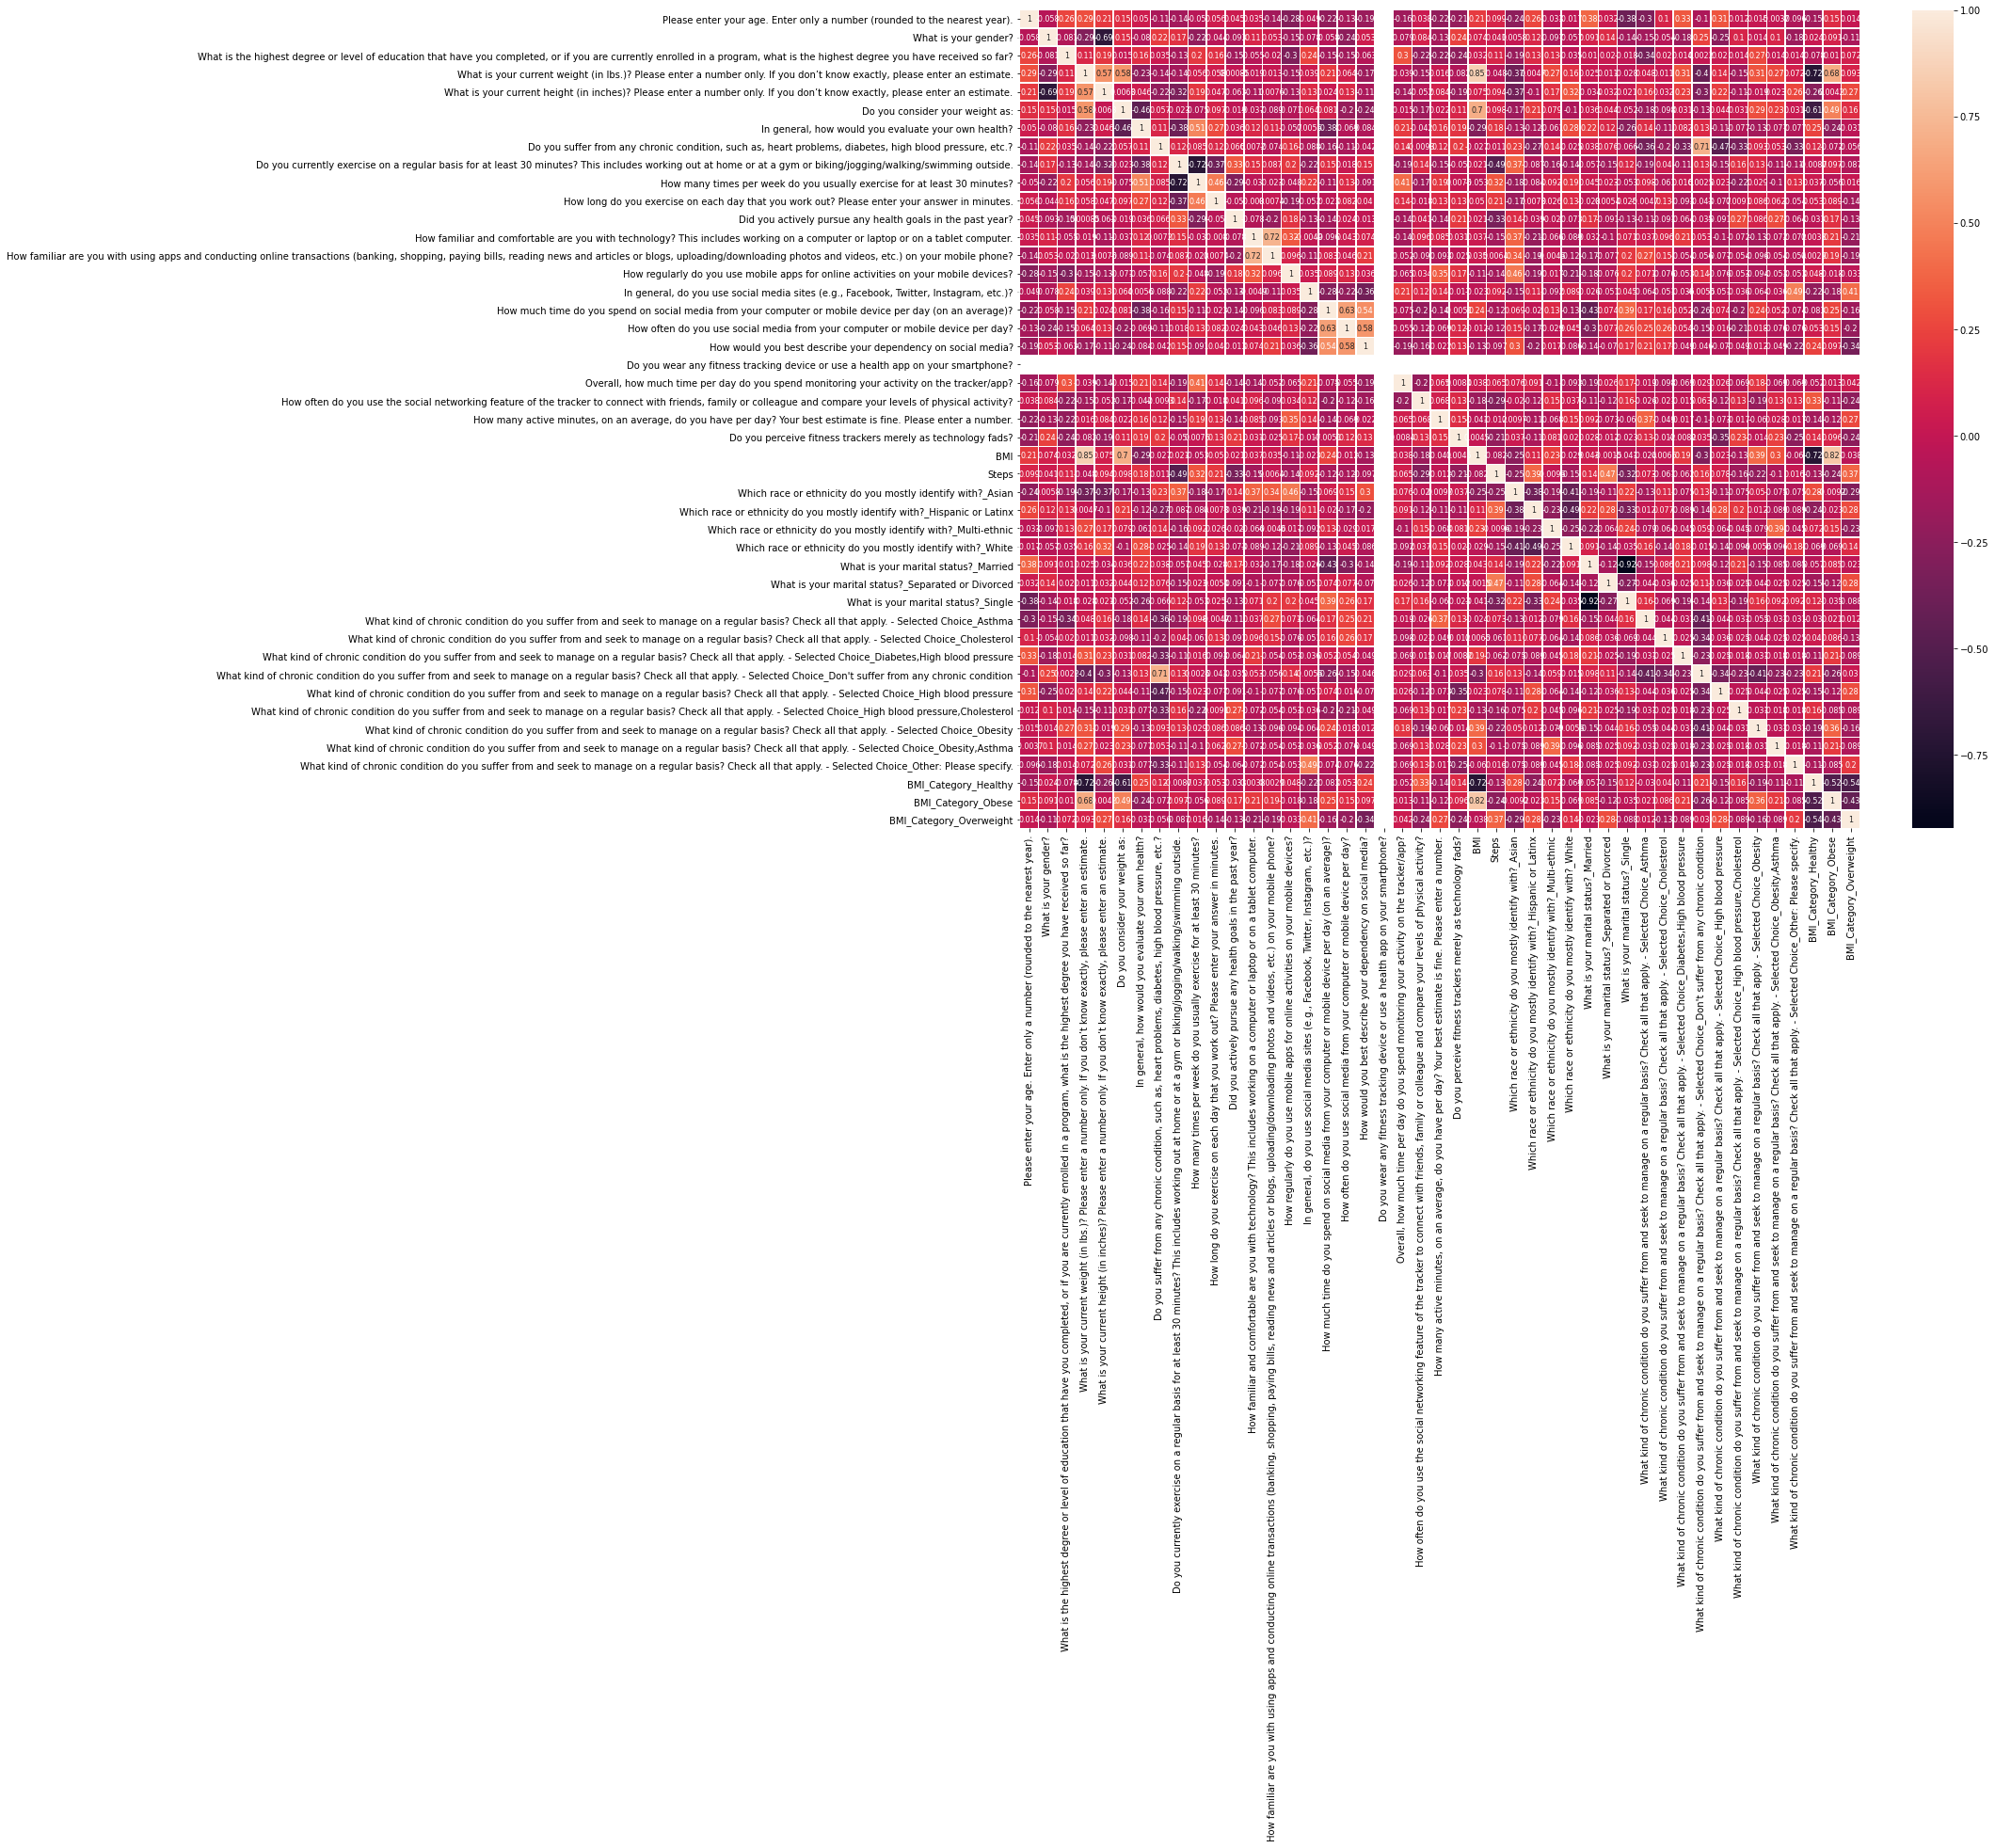

In [ ]:
#Create heatmap for correlations
import seaborn as sns
plt.subplots(figsize=(20,16))
sns.heatmap(corr, annot = True, linewidths=0.5, cmap='rocket',annot_kws={"size": 8})
plt.show()

In [ ]:
dat1.shape

(58, 63)

In [ ]:
dat1.to_excel('steps.xlsx')

In [ ]:
dat1.head(5)

,Please enter your age. Enter only a number (rounded to the nearest year).,What is your gender?,"What is the highest degree or level of education that have you completed, or if you are currently enrolled in a program, what is the highest degree you have received so far?","What is your current weight (in lbs.)? Please enter a number only. If you don’t know exactly, please enter an estimate.","What is your current height (in inches)? Please enter a number only. If you don’t know exactly, please enter an estimate.",Do you consider your weight as:,"In general, how would you evaluate your own health?","Do you suffer from any chronic condition, such as, heart problems, diabetes, high blood pressure, etc.?",Do you currently exercise on a regular basis for at least 30 minutes? This includes working out at home or at a gym or biking/jogging/walking/swimming outside.,How many times per week do you usually exercise for at least 30 minutes?,How long do you exercise on each day that you work out? Please enter your answer in minutes.,Did you actively pursue any health goals in the past year?,Please rate the extent to which you agree with the following statements about your motivations to exercise. - I exercise because I feel under pressure from my friends and family to do so,Please rate the extent to which you agree with the following statements about your motivations to exercise. - I feel guilty when I do not exercise,Please rate the extent to which you agree with the following statements about your motivations to exercise. - I think it is important to make the effort to exercise regularly,Please rate the extent to which you agree with the following statements about your motivations to exercise. - I exercise because it is fun,Please rate the extent to which you agree with the following statements about your motivations to exercise. - I exercise because is makes me feel good,Please rate the extent to which you agree with the following statements about your motivations to exercise. - I exercise because I know it will keep me healthy,Please rate the extent to which you agree with the following statements about your motivations to exercise. - I do not see why I should have to exercise,How familiar and comfortable are you with technology? This includes working on a computer or laptop or on a tablet computer.,"How familiar are you with using apps and conducting online transactions (banking, shopping, paying bills, reading news and articles or blogs, uploading/downloading photos and videos, etc.) on your mobile phone?",How regularly do you use mobile apps for online activities on your mobile devices?,"In general, do you use social media sites (e.g., Facebook, Twitter, Instagram, etc.)?",How much time do you spend on social media from your computer or mobile device per day (on an average)?,How often do you use social media from your computer or mobile device per day?,How would you best describe your dependency on social media?,Do you wear any fitness tracking device or use a health app on your smartphone?,How long have you been using this device/app to track and monitor your health and physical activity?,Why did you start using the tracker/app? Select all that apply. - Selected Choice,Why did you start using the tracker/app? Select all that apply. - Other: Please specify. - Text,"Overall, how much time per day do you spend monitoring your activity on the tracker/app?",Do you wear/use your fitness tracker or use the app regularly?,Which extra features of the tracker/app do you use on a regular basis? Check all that apply.,"How often do you use the social networking feature of the tracker to connect with friends, family or colleague and compare your levels of physical activity?",Does the social networking feature of your tracker/app (the ability to connect with others and share progress) motivate your usage of the tracker/app?,"Compared to your physical activity before you started using the fitness tracker/app, how active are you now?",How would you